# Exercise 1: E‑commerce Delivery Times

An online retailer promises 3‑day shipping. Occasionally, storms delay a few packages. Can you confidently continue advertising that you offer “3 day delivery” given occasional storm delays? To do this, you need to complete three tasks. 

1) run the below cell to simulate the data

2) calculate a log-likelihood estimate where we assume delivery times $~ N(\mu, \sigma^2)$ with known $\sigma = 0.5$ Find the $\mu$ that maximizes the likelihood of $\mu$ (note we will be minimizing the log of the likelihood.)

3) Calculate a 95% boostrap CI: Resample the 100 observations 2000 times, compute $\hat{\mu}$ for each bootstrap sample, and take the 2.5 % and 97.5 % percentiles.



(array([19., 47., 31.,  0.,  0.,  0.,  2.,  0.,  0.,  1.]),
 array([ 1.60070545,  2.49050217,  3.3802989 ,  4.27009563,  5.15989236,
         6.04968909,  6.93948581,  7.82928254,  8.71907927,  9.608876  ,
        10.49867272]),
 <BarContainer object of 10 artists>)

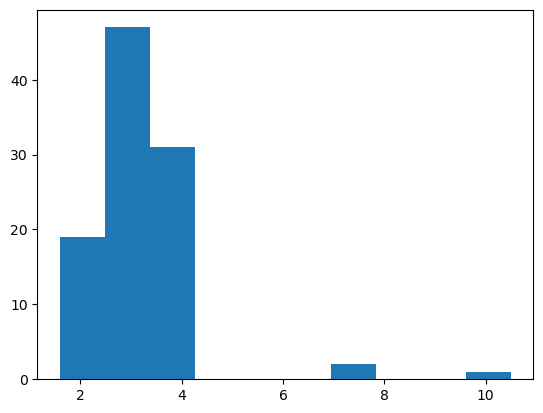

In [10]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(123)
# 100 on‑time deliveries ~ N(3 days, 0.5**2)
delivery_times = np.random.normal(3.0, 0.5, size=100)
# 3 extreme delays
delivery_times[:3] += np.array([5.0, 7.0, 4.0])

plt.hist(delivery_times)


### Helpful code:

In [ ]:
from scipy import stats

# 1. Define neg‐log‐likelihood correctly 
def neg_log_lik(mu, data):
    return -np.sum(stats.norm.logpdf(data, loc=mu, scale=0.5))

# 2. Define your grid
mu_values = np.linspace(0.0, 6.0, 601)

# 3. Compute NLL on full data
nlls = [ neg_log_lik(mu, delivery_times) for mu in mu_values ]

# your task: find the best value from nlls
index = nlls.index(min(nlls))
print(f'Best Value of mu: {mu_values[index]}')


# 4. Bootstrap
boots = []
for _ in range(2000):
    sample = np.random.choice(delivery_times, size=100, replace=True)
    nlls_bs = [
        -np.sum(stats.norm.logpdf(sample, loc=mu, scale=0.5))
        for mu in mu_values
    ]
    boots.append(mu_values[np.argmin(nlls_bs)])

lower_percentile = np.percentile(boots, 2.5)
upper_percentile = np.percentile(boots, 97.5)

# your task: get the 2.5 and 97.5 %ile from boots

print(f'2.5th Percentile: {lower_percentile}')
print(f'97.5th Percentile: {upper_percentile}')



Best Value of mu: 3.17
2.5th Percentile: 2.98
97.5th Percentile: 3.3902499999999987


## Questions

1) What is $\hat{\mu}$? How far is it from 3.0 days, and how did the 3 outliers pull it?

2) Does the 95 % CI include 3.0? What does that imply for your “3‑day promise”?

3) If you removed the 3 delays, how would μ̂ and the CI change?

1. predicted mu is 3.17, which is above 3.0 days by a little and pulled by outliers
2. 95% CI does include 3.0, implying "3-day promise" is upheld
3. predicted mu would decrease and CI would be more centered towards 3 probably

# Exercise 2: Call‑Center Inter‑arrival Times

A support center sees calls arriving with mean gap 5 min. Downtime causes a few very long gaps. Do you currently have enough call agents to keep the average hold‑times below 5 min? To do this you need to complete three tasks:

1) run the below cell to simulate the data

2) calculate a log-likelihood estimate where we assume call gaps $~ Exp(\lambda)$. Find the $\lambda$ that maximizes the likelihood of $\lambda$ (note we will be minimizing the log of the likelihood.)

3) Calculate a 95% boostrap CI: Resample the 200 observations 2000 times, compute $\hat{\lambda}$ for each bootstrap sample, and take the 2.5 % and 97.5 % percentiles.




/var/folders/l5/c83q5w7j3wvcv1kvpg3d5qc80000gn/T/ipykernel_40380/1884994525.py:15: RuntimeWarning: divide by zero encountered in scalar divide
  return -np.sum(stats.expon.logpdf(data, scale=1/lam))


Best Value of lam: 0.18036072144288576
2.5th Percentile: 0.142475092164541
97.5th Percentile: 0.21385464882650537


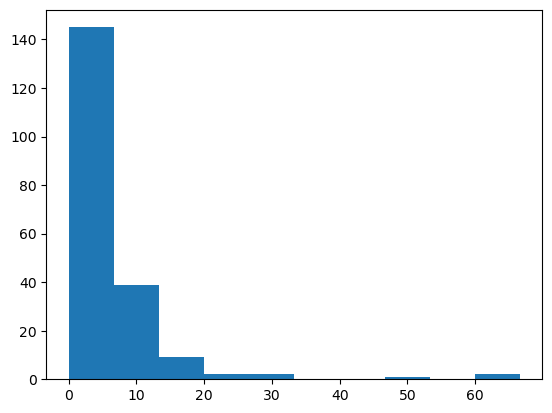

In [30]:
from scipy import optimize
# pseudocode to help 

# 1. MLE (PAUSE HERE WHAT IS THIS FUNCTION DOING BELOW)

# Reconstruct the data
np.random.seed(42)
gaps = np.random.exponential(scale=5.0, size=200)
gaps[:5] += np.array([30, 45, 60, 25, 50])

plt.hist(gaps)

# 1. MLE for λ
def neg_log_lik(lam, data):
    return -np.sum(stats.expon.logpdf(data, scale=1/lam))

# your task: create a grid of values to "check" (i.e., linspace like the last problem). Then, find the the best value from nlls

lam_values = np.linspace(0, 10, 500)

nlls = [ neg_log_lik(lam, gaps) for lam in lam_values ]

# your task: find the best value from nlls
index = nlls.index(min(nlls))
print(f'Best Value of lam: {lam_values[index]}')


# 2. Bootstrap CI
boots = []
for _ in range(2000):
    samp = np.random.choice(gaps, size=200, replace=True)
    r = optimize.minimize(lambda l: neg_log_lik(l, samp), x0=0.2, bounds=[(1e-6, None)])
    boots.append(r.x[0])

# your task: get the 2.5 and 97.5 %ile from boots

lower_percentile = np.percentile(boots, 2.5)
upper_percentile = np.percentile(boots, 97.5)

print(f'2.5th Percentile: {lower_percentile}')
print(f'97.5th Percentile: {upper_percentile}')



## Questions

1) What is the estimated rate $\hat{\lambda}$? How does it compare to the true 0.2?

2) How robust is $\hat{\lambda}$ to the 5 downtimes (i.e., do the 5 downtimes shift the mean at all)?

3) Does the CI cover 0.2? What does this mean for staffing predictions?







1. estimsted rate predicted lam is 0.18, a bit lower than 0.2
2. not really, shifts up actually
3. Yes it does, prediction is correct but may be because of the downtimes

# Exercise 3: Household Electricity Usage


Hourly household consumption (kWh) is log‑normally distributed (median ~ 20 kWh); rare equipment failures spike usage. Find the most value for the electricity usage and then construct a confidence interval for them. You've only budgeted to use 20 kWh per hour. 

(array([121.,  25.,   0.,   2.,   0.,   0.,   0.,   1.,   0.,   1.]),
 array([ 10.06674828,  25.66572022,  41.26469216,  56.86366409,
         72.46263603,  88.06160797, 103.66057991, 119.25955184,
        134.85852378, 150.45749572, 166.05646766]),
 <BarContainer object of 10 artists>)

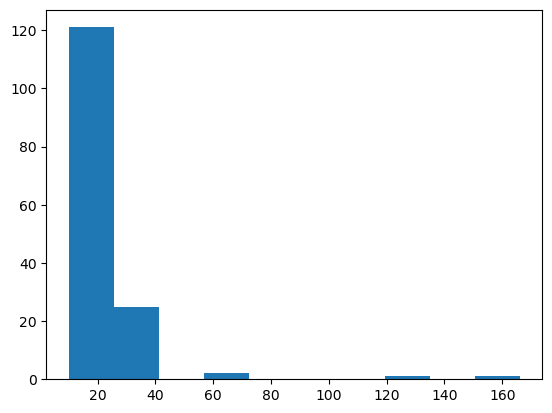

In [31]:
import numpy as np
np.random.seed(7)
usage = np.random.lognormal(mean=np.log(20), sigma=0.3, size=150)
usage[:4] *= np.array([5, 4, 6, 3])

plt.hist(usage)

In [34]:
def neg_log_lik(data, median_guess, sigma=0.5):
    return -np.sum(stats.lognorm.logpdf(data, s=sigma, loc=0, scale=median_guess))

# Grid of median values to test
med_values = np.linspace(10.0, 30.0, 601)

# Compute NLL across the grid
nlls = [neg_log_lik(usage, med) for med in med_values]

# Find best estimate of median (lowest NLL)
best_index = np.argmin(nlls)
best_median = med_values[best_index]
print(f'Best Value of median: {best_median:.2f} kWh')

# 4. Bootstrap
boots = []
for _ in range(2000):
    sample = np.random.choice(usage, size=100, replace=True)
    nlls_bs = [
        -np.sum(stats.norm.logpdf(sample, loc=med, scale=0.5))
        for med in med_values
    ]
    boots.append(med_values[np.argmin(nlls_bs)])

lower_percentile = np.percentile(boots, 2.5)
upper_percentile = np.percentile(boots, 97.5)

# your task: get the 2.5 and 97.5 %ile from boots

print(f'2.5th Percentile: {lower_percentile}')
print(f'97.5th Percentile: {upper_percentile}')

Best Value of median: 20.50 kWh
2.5th Percentile: 20.09916666666667
97.5th Percentile: 26.5


## Questions:

1) What is the estimated median usage?

2) Would you budget 20 kWh per hour per home confidently or should you budget more?

1. 20.5
2. I would budget more cuz it is on the higher end